In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 500

In [3]:
df_model = pd.read_csv('df_model_final.csv', index_col=0)

C:\Users\Owner\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df_model.head(10)

,ab_id,fastball,fastball_more,inning_pitch_count,px_prev,pz_prev,on_1b,on_2b,on_3b,p_throws_num,stand_num,top_num,pitch_num_2,pitch_num_3,pitch_num_4,pitch_num_5,pitch_num_6,pitch_num_7,pitch_num_8,pitch_num_9,pitch_num_10,b_count_1,b_count_2,b_count_3,s_count_1,s_count_2,outs_1,outs_2,inning_2,inning_3,inning_4,inning_5,inning_6,inning_7,inning_8,inning_9,inning_10,pitcher_lead_-10,pitcher_lead_-9,pitcher_lead_-8,pitcher_lead_-7,pitcher_lead_-6,pitcher_lead_-5,pitcher_lead_-4,pitcher_lead_-3,pitcher_lead_-2,pitcher_lead_-1,pitcher_lead_1,pitcher_lead_2,pitcher_lead_3,pitcher_lead_4,pitcher_lead_5,pitcher_lead_6,pitcher_lead_7,pitcher_lead_8,pitcher_lead_9,pitcher_lead_10,prev_pitch_CH,prev_pitch_CU,prev_pitch_EP,prev_pitch_FC,prev_pitch_FF,prev_pitch_FO,prev_pitch_FS,prev_pitch_FT,prev_pitch_IN,prev_pitch_KC,prev_pitch_KN,prev_pitch_PO,prev_pitch_SC,prev_pitch_SI,prev_pitch_SL
0,2015000001,1,1,1,0.000,0.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015000001,1,1,2,0.416,2.963,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2015000001,1,1,3,-0.191,2.347,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2015000001,1,1,4,-0.518,3.284,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2015000001,0,0,5,-0.641,1.221,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,2015000001,1,1,6,-1.821,2.083,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2015000002,1,1,7,0.000,0.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2015000002,0,1,8,-1.088,1.610,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,2015000003,1,1,9,0.000,0.000,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2015000003,1,1,10,1.470,2.350,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [5]:
df_model.columns

Index(['ab_id', 'fastball', 'fastball_more', 'inning_pitch_count', 'px_prev',
       'pz_prev', 'on_1b', 'on_2b', 'on_3b', 'p_throws_num', 'stand_num',
       'top_num', 'pitch_num_2', 'pitch_num_3', 'pitch_num_4', 'pitch_num_5',
       'pitch_num_6', 'pitch_num_7', 'pitch_num_8', 'pitch_num_9',
       'pitch_num_10', 'b_count_1', 'b_count_2', 'b_count_3', 's_count_1',
       's_count_2', 'outs_1', 'outs_2', 'inning_2', 'inning_3', 'inning_4',
       'inning_5', 'inning_6', 'inning_7', 'inning_8', 'inning_9', 'inning_10',
       'pitcher_lead_-10', 'pitcher_lead_-9', 'pitcher_lead_-8',
       'pitcher_lead_-7', 'pitcher_lead_-6', 'pitcher_lead_-5',
       'pitcher_lead_-4', 'pitcher_lead_-3', 'pitcher_lead_-2',
       'pitcher_lead_-1', 'pitcher_lead_1', 'pitcher_lead_2', 'pitcher_lead_3',
       'pitcher_lead_4', 'pitcher_lead_5', 'pitcher_lead_6', 'pitcher_lead_7',
       'pitcher_lead_8', 'pitcher_lead_9', 'pitcher_lead_10', 'prev_pitch_CH',
       'prev_pitch_CU', 'prev_pitch_EP', 

In [6]:
df_model.shape

(2867154, 72)

In [7]:
df_sample = df_model.sample(145000, random_state=6)

In [8]:
df_sample['fastball_more'].value_counts()

1    75987
0    69013
Name: fastball_more, dtype: int64

In [9]:
X = df_sample.iloc[:, 3:]
y = df_sample.iloc[:, 2]
X.columns

Index(['inning_pitch_count', 'px_prev', 'pz_prev', 'on_1b', 'on_2b', 'on_3b',
       'p_throws_num', 'stand_num', 'top_num', 'pitch_num_2', 'pitch_num_3',
       'pitch_num_4', 'pitch_num_5', 'pitch_num_6', 'pitch_num_7',
       'pitch_num_8', 'pitch_num_9', 'pitch_num_10', 'b_count_1', 'b_count_2',
       'b_count_3', 's_count_1', 's_count_2', 'outs_1', 'outs_2', 'inning_2',
       'inning_3', 'inning_4', 'inning_5', 'inning_6', 'inning_7', 'inning_8',
       'inning_9', 'inning_10', 'pitcher_lead_-10', 'pitcher_lead_-9',
       'pitcher_lead_-8', 'pitcher_lead_-7', 'pitcher_lead_-6',
       'pitcher_lead_-5', 'pitcher_lead_-4', 'pitcher_lead_-3',
       'pitcher_lead_-2', 'pitcher_lead_-1', 'pitcher_lead_1',
       'pitcher_lead_2', 'pitcher_lead_3', 'pitcher_lead_4', 'pitcher_lead_5',
       'pitcher_lead_6', 'pitcher_lead_7', 'pitcher_lead_8', 'pitcher_lead_9',
       'pitcher_lead_10', 'prev_pitch_CH', 'prev_pitch_CU', 'prev_pitch_EP',
       'prev_pitch_FC', 'prev_pitch_FF', 'pre

In [10]:
y.shape

(145000,)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, stratify=y)

### Logistic Regression

In [24]:
# split the dataframe
X = df_sample.iloc[:, 2:]
y = df_sample.iloc[:, 1]

# split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, stratify=y)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

0.601903448276


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.62      0.41      0.50     17253
           1       0.59      0.78      0.67     18997

   micro avg       0.60      0.60      0.60     36250
   macro avg       0.61      0.59      0.58     36250
weighted avg       0.61      0.60      0.59     36250



In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_lr))

[[ 7084 10169]
 [ 4262 14735]]


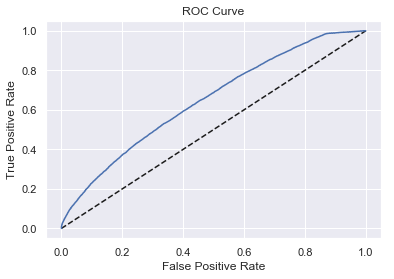

In [18]:
from sklearn.metrics import roc_curve
y_pred_prob_lr = grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)

_ = sns.set()
_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr, tpr)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.show()

In [19]:
from sklearn.metrics import roc_auc_score
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
print(auc_lr)

0.647743318619


In [25]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
lr_results = pd.DataFrame({'features': df_model.columns[3:], 'coefficients': grid.coef_.flatten()})
print(grid_results.sort_values('coefficients', ascending=False))

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

### SVC

In [28]:
from sklearn.svm import SVC
svc = SVC()
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(svc, param_grid, cv=2, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred_svc = grid.predict(X_test)
print(grid.score(X_test, y_test))

KeyboardInterrupt: 

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.64      0.37      0.47     59525
           1       0.59      0.81      0.68     65475

   micro avg       0.60      0.60      0.60    125000
   macro avg       0.61      0.59      0.57    125000
weighted avg       0.61      0.60      0.58    125000



In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_svc))

[[21903 37622]
 [12167 53308]]


In [24]:
lsvc_results = pd.DataFrame({'features': df_model.columns[3:], 'coefficients': svc.coef_.flatten()})
print(svc_results.sort_values('coefficients', ascending=False))

              features  coefficients
63       prev_pitch_FC      1.229837
67       prev_pitch_FT      1.128042
64       prev_pitch_FF      1.092131
65       prev_pitch_FO      1.014892
61       prev_pitch_CU      0.922247
69       prev_pitch_KC      0.894422
60       prev_pitch_CH      0.883291
71       prev_pitch_PO      0.854842
74       prev_pitch_SL      0.850244
66       prev_pitch_FS      0.838115
62       prev_pitch_EP      0.771754
9          pitch_num_1      0.644814
22           b_count_3      0.158306
73       prev_pitch_SI      0.121148
29            inning_1      0.094073
23           s_count_0      0.090845
70       prev_pitch_KN      0.087248
59     pitcher_lead_10      0.051114
3                on_1b      0.033189
57      pitcher_lead_8      0.030562
55      pitcher_lead_6      0.027509
54      pitcher_lead_5      0.027005
6         p_throws_num      0.024654
52      pitcher_lead_3      0.015506
7            stand_num      0.011563
53      pitcher_lead_4      0.010540
5

### SGDClassifier

In [25]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
y_pred_sgdc = sgdc.predict(X_test)
print(sgdc.score(X_test, y_test))

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.560704


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sgdc))

              precision    recall  f1-score   support

           0       0.52      0.81      0.64     59525
           1       0.66      0.33      0.44     65475

   micro avg       0.56      0.56      0.56    125000
   macro avg       0.59      0.57      0.54    125000
weighted avg       0.60      0.56      0.53    125000



In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_sgdc))

[[48492 11033]
 [43879 21596]]


In [28]:
sgdc_results = pd.DataFrame({'features': df_model.columns[3:], 'coefficients': sgdc.coef_.flatten()})
print(sgdc_results.sort_values('coefficients', ascending=False))

              features  coefficients
63       prev_pitch_FC      2.345417
64       prev_pitch_FF      2.116206
67       prev_pitch_FT      1.988274
61       prev_pitch_CU      1.380598
69       prev_pitch_KC      1.380598
60       prev_pitch_CH      1.178039
74       prev_pitch_SL      1.162048
9          pitch_num_1      0.970150
66       prev_pitch_FS      0.954158
22           b_count_3      0.719617
65       prev_pitch_FO      0.607676
23           s_count_0      0.453092
29            inning_1      0.405117
71       prev_pitch_PO      0.319830
62       prev_pitch_EP      0.282516
3                on_1b      0.245203
59     pitcher_lead_10      0.186567
37            inning_9      0.143923
56      pitcher_lead_7      0.138593
31            inning_3      0.127932
51      pitcher_lead_2      0.095949
8              top_num      0.090618
58      pitcher_lead_9      0.085288
54      pitcher_lead_5      0.079957
36            inning_8      0.079957
1              px_prev      0.069858
2

### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

_ = sns.set()
_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr, tpr)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
print(auc)

In [ ]:
from sklearn.model_selection import cross_val_score
cv_auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(cv_auc)

### Random Forest Classifier - Tuning Round 1 

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
param_grid = {'n_estimators': [100, 300, 500, 800, 1200], 'max_depth': [5, 8, 15, 25, 30], 'min_samples_split': [2, 5, 10, 15, 30], 'min_samples_leaf': [1, 2, 5, 10]}
grid = RandomizedSearchCV(rfc, param_grid, cv=2, scoring='accuracy', n_iter=15, random_state=6)
grid.fit(X_train, y_train)
y_pred_rfc = grid.predict(X_test)
print(grid.score(X_test, y_test))

0.606427586207


In [31]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Random Forest Classifier - Tuning Round 2

In [33]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(max_depth=15, min_samples_leaf=1)
param_grid = {'n_estimators': [1200, 1500, 1800], 'min_samples_split': [30, 50, 70]}
grid = GridSearchCV(rfc, param_grid, cv=2, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred_rfc = grid.predict(X_test)
print(grid.score(X_test, y_test))

0.606344827586


In [34]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57     59525
           1       0.60      0.56      0.58     65475

   micro avg       0.57      0.57      0.57    125000
   macro avg       0.57      0.57      0.57    125000
weighted avg       0.57      0.57      0.57    125000



In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc))

[[34948 24577]
 [28840 36635]]


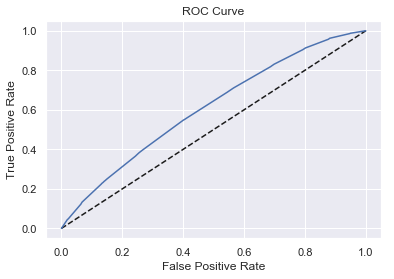

In [32]:
from sklearn.metrics import roc_curve
y_pred_prob_rfc = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfc)

_ = sns.set()
_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr, tpr)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
auc_rfc = roc_auc_score(y_test, y_pred_prob_rfc)
print(auc_rfc)

0.608126960302


In [35]:
results_rfc = pd.DataFrame({'features': df_model.columns[3:], 'importance': rfc.feature_importances_})
print(results_rfc.sort_values('importance', ascending=False))

              features  importance
0   inning_pitch_count    0.157178
2              pz_prev    0.147012
1              px_prev    0.146623
73       prev_pitch_SI    0.043236
8              top_num    0.035064
7            stand_num    0.031747
6         p_throws_num    0.027191
3                on_1b    0.022104
4                on_2b    0.016604
49      pitcher_lead_0    0.014733
48     pitcher_lead_-1    0.013799
50      pitcher_lead_1    0.013599
27              outs_1    0.012511
5                on_3b    0.011951
28              outs_2    0.011524
51      pitcher_lead_2    0.011426
31            inning_3    0.011387
47     pitcher_lead_-2    0.011273
33            inning_5    0.011134
32            inning_4    0.011067
36            inning_8    0.010992
35            inning_7    0.010592
34            inning_6    0.010442
64       prev_pitch_FF    0.010385
26              outs_0    0.010087
52      pitcher_lead_3    0.009190
46     pitcher_lead_-3    0.009065
30            inning

### AdaBoostClassifier

In [36]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred_abc = abc.predict(X_test)
print(abc.score(X_test, y_test))

0.601968


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_abc))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49     59525
           1       0.59      0.78      0.67     65475

   micro avg       0.60      0.60      0.60    125000
   macro avg       0.61      0.59      0.58    125000
weighted avg       0.61      0.60      0.59    125000



In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_abc))

[[23857 35668]
 [14086 51389]]


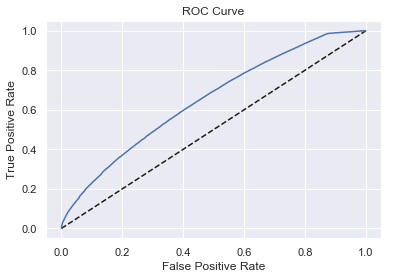

In [39]:
from sklearn.metrics import roc_curve
y_pred_prob_abc = abc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_abc)

_ = sns.set()
_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr, tpr)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.show()

In [41]:
from sklearn.metrics import roc_auc_score
auc_abc = roc_auc_score(y_test, y_pred_prob_abc)
print(auc_abc)

0.648829652209


In [42]:
results_abc = pd.DataFrame({'features': df_model.columns[3:], 'importance': abc.feature_importances_})
print(results_abc.sort_values('importance', ascending=False))

              features  importance
1              px_prev        0.08
22           b_count_3        0.06
64       prev_pitch_FF        0.06
67       prev_pitch_FT        0.04
23           s_count_0        0.04
63       prev_pitch_FC        0.04
74       prev_pitch_SL        0.04
73       prev_pitch_SI        0.04
2              pz_prev        0.04
68       prev_pitch_IN        0.02
70       prev_pitch_KN        0.02
61       prev_pitch_CU        0.02
54      pitcher_lead_5        0.02
52      pitcher_lead_3        0.02
36            inning_8        0.02
32            inning_4        0.02
30            inning_2        0.02
29            inning_1        0.02
27              outs_1        0.02
26              outs_0        0.02
25           s_count_2        0.02
24           s_count_1        0.02
53      pitcher_lead_4        0.02
0   inning_pitch_count        0.02
21           b_count_2        0.02
14         pitch_num_6        0.02
3                on_1b        0.02
4                on_

### Gradient Boosting Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print(gbc.score(X_test, y_test))

0.605288


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.62      0.43      0.51     59525
           1       0.60      0.76      0.67     65475

   micro avg       0.61      0.61      0.61    125000
   macro avg       0.61      0.60      0.59    125000
weighted avg       0.61      0.61      0.59    125000



In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_gbc))

[[25890 33635]
 [15704 49771]]


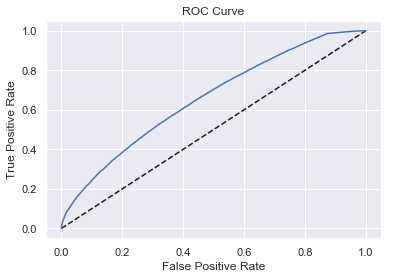

In [46]:
from sklearn.metrics import roc_curve
y_pred_prob_gbc = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gbc)

_ = sns.set()
_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr, tpr)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.show()

In [47]:
from sklearn.metrics import roc_auc_score
auc_gbc = roc_auc_score(y_test, y_pred_prob_gbc)
print(auc_gbc)

0.65662762249


In [49]:
results_gbc = pd.DataFrame({'features': df_model.columns[3:], 'importance': gbc.feature_importances_})
print(results_gbc.sort_values('importance', ascending=False))

              features  importance
73       prev_pitch_SI    0.480888
22           b_count_3    0.082032
23           s_count_0    0.069694
64       prev_pitch_FF    0.050564
25           s_count_2    0.041368
63       prev_pitch_FC    0.034656
67       prev_pitch_FT    0.030750
29            inning_1    0.028377
74       prev_pitch_SL    0.024125
70       prev_pitch_KN    0.022711
68       prev_pitch_IN    0.021173
0   inning_pitch_count    0.020795
4                on_2b    0.013250
20           b_count_1    0.011046
21           b_count_2    0.009140
10         pitch_num_2    0.006529
37            inning_9    0.006324
2              pz_prev    0.005942
9          pitch_num_1    0.004676
30            inning_2    0.004447
3                on_1b    0.004445
26              outs_0    0.004438
36            inning_8    0.003586
5                on_3b    0.003392
1              px_prev    0.002830
19           b_count_0    0.002529
32            inning_4    0.001961
6         p_throws_n

### Gaussian Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(gnb.score(X_test, y_test))

0.576768


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.86      0.13      0.23     59525
           1       0.55      0.98      0.71     65475

   micro avg       0.58      0.58      0.58    125000
   macro avg       0.71      0.56      0.47    125000
weighted avg       0.70      0.58      0.48    125000



In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_gnb))

[[ 7941 51584]
 [ 1320 64155]]


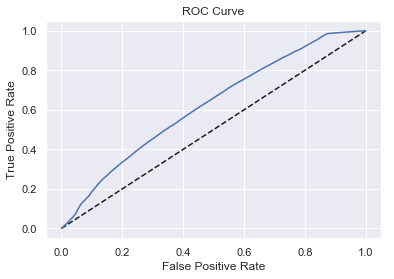

In [53]:
from sklearn.metrics import roc_curve
y_pred_prob_gnb = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gnb)

_ = sns.set()
_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr, tpr)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.show()

In [54]:
from sklearn.metrics import roc_auc_score
auc_gnb = roc_auc_score(y_test, y_pred_prob_gnb)
print(auc_gnb)

0.621234070091
